Import libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# scikit learn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.linear_model import Lasso

Read csv file

In [3]:
df = pd.read_csv("Drinking_water.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3276 non-null   int64  
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
 11  Carcinogenics    0 non-null      float64
 12  medical_waste    0 non-null      float64
dtypes: float64(11), int64(2)
memory usage: 332.8 KB


In [4]:
df = df.iloc[: , 1:-2]

In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Get means for replacing missing datas

In [7]:
ph_mean = df["ph"].mean()
sulfate_mean = df["Sulfate"].mean()
trihalomethanes_mean = df["Trihalomethanes"].mean()

In [ ]:
df["ph"] = df["ph"].fillna(ph_mean)
df["Sulfate"] = df["Sulfate"].fillna(sulfate_mean)
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(sulfate_mean)

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Plot correlation map

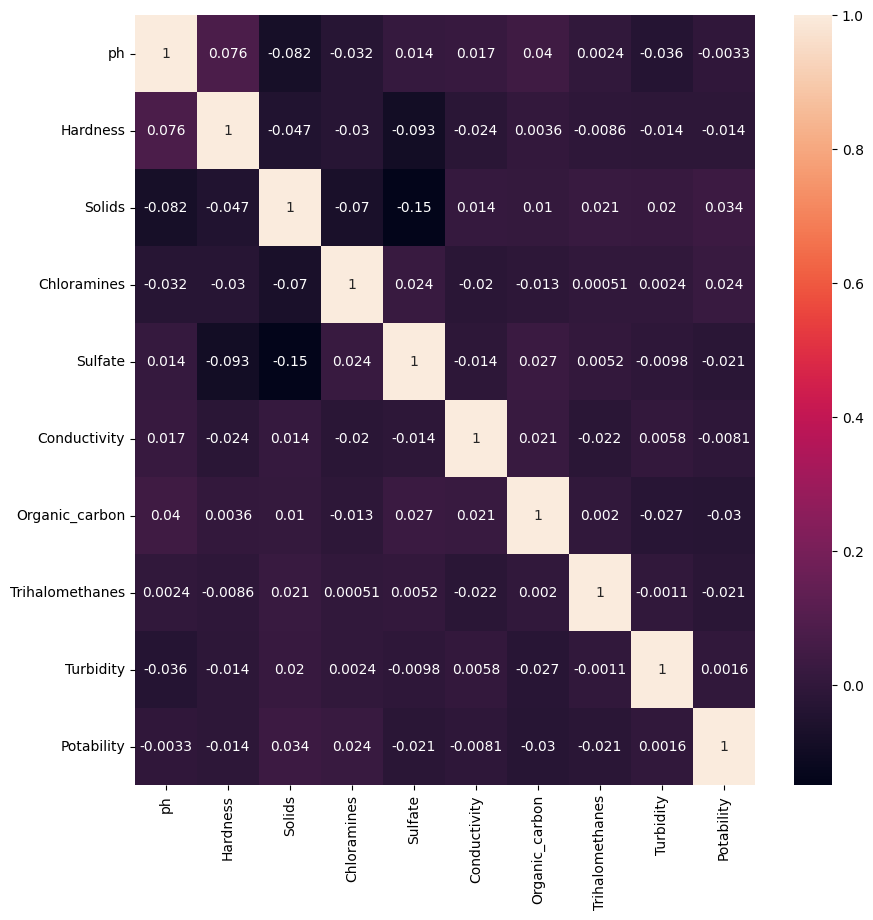

In [ ]:
plt.figure(figsize=(10,10)) # 10x10 features
sns.heatmap(df.corr(),annot=True)
plt.show()

Extract datas

In [ ]:
test_size = 0.25

x = df.drop("Potability",axis=1)
y = df["Potability"]
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=test_size, random_state=25)

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Plot relatations of pairs

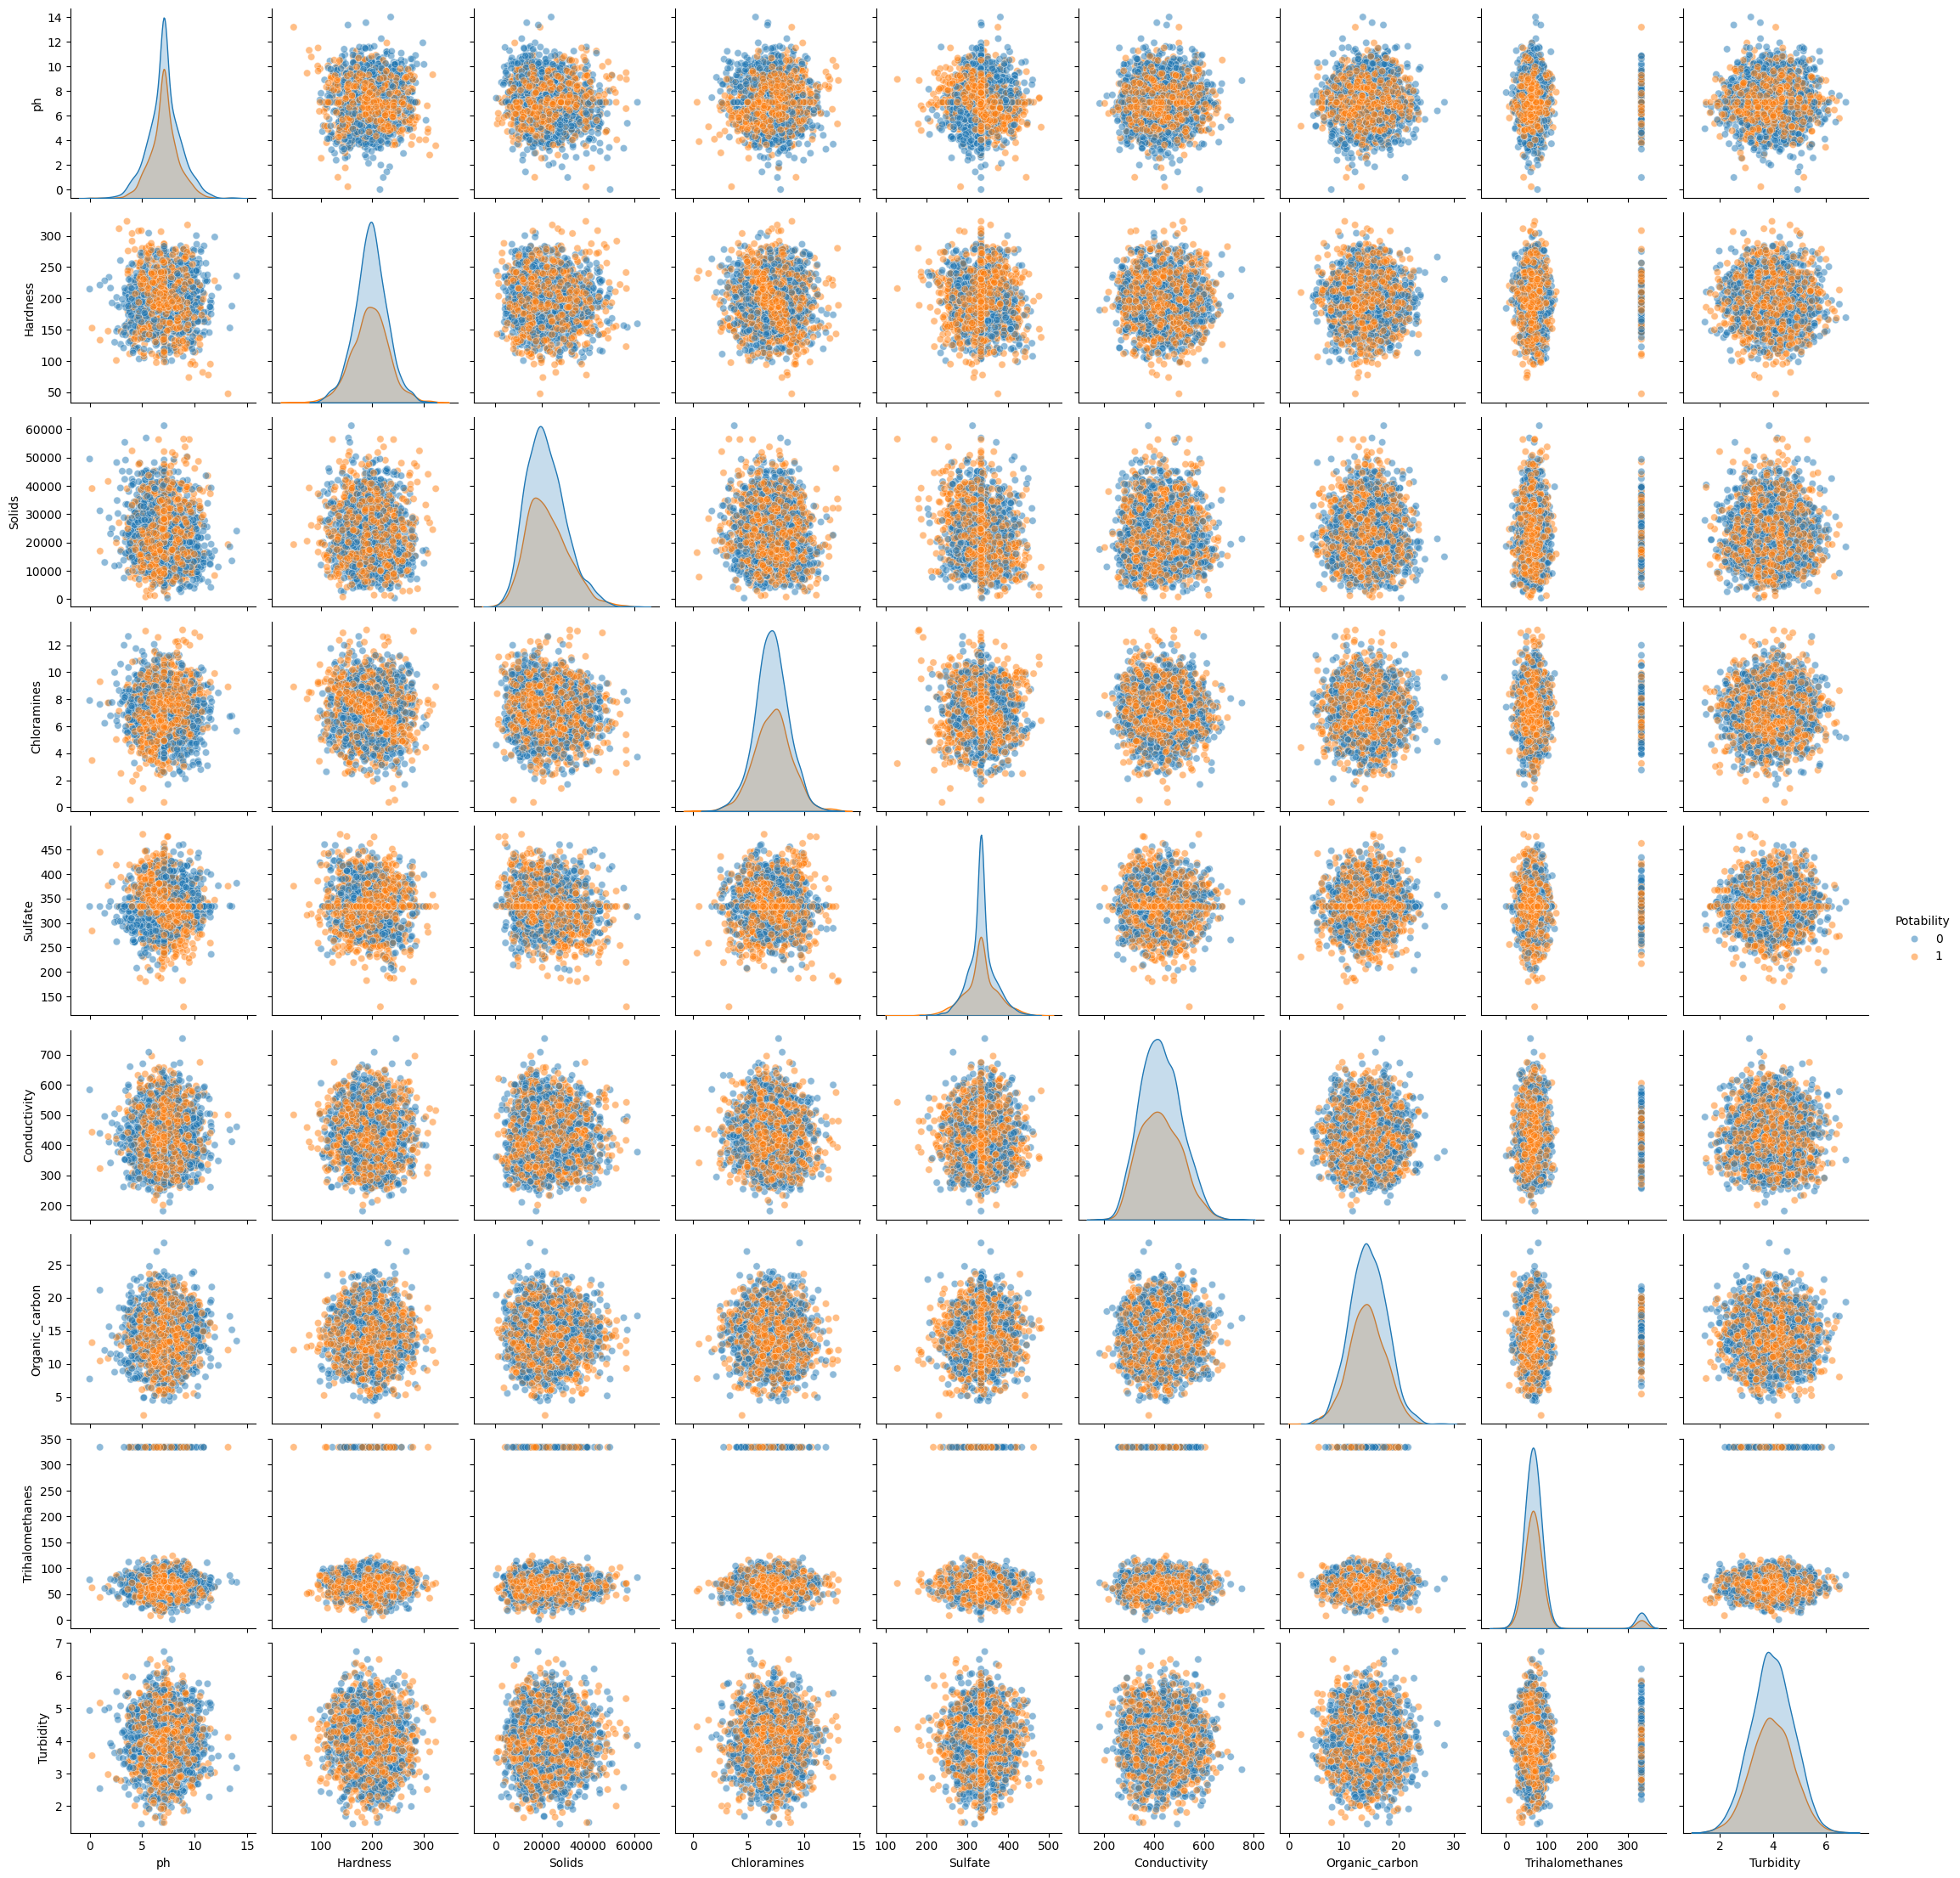

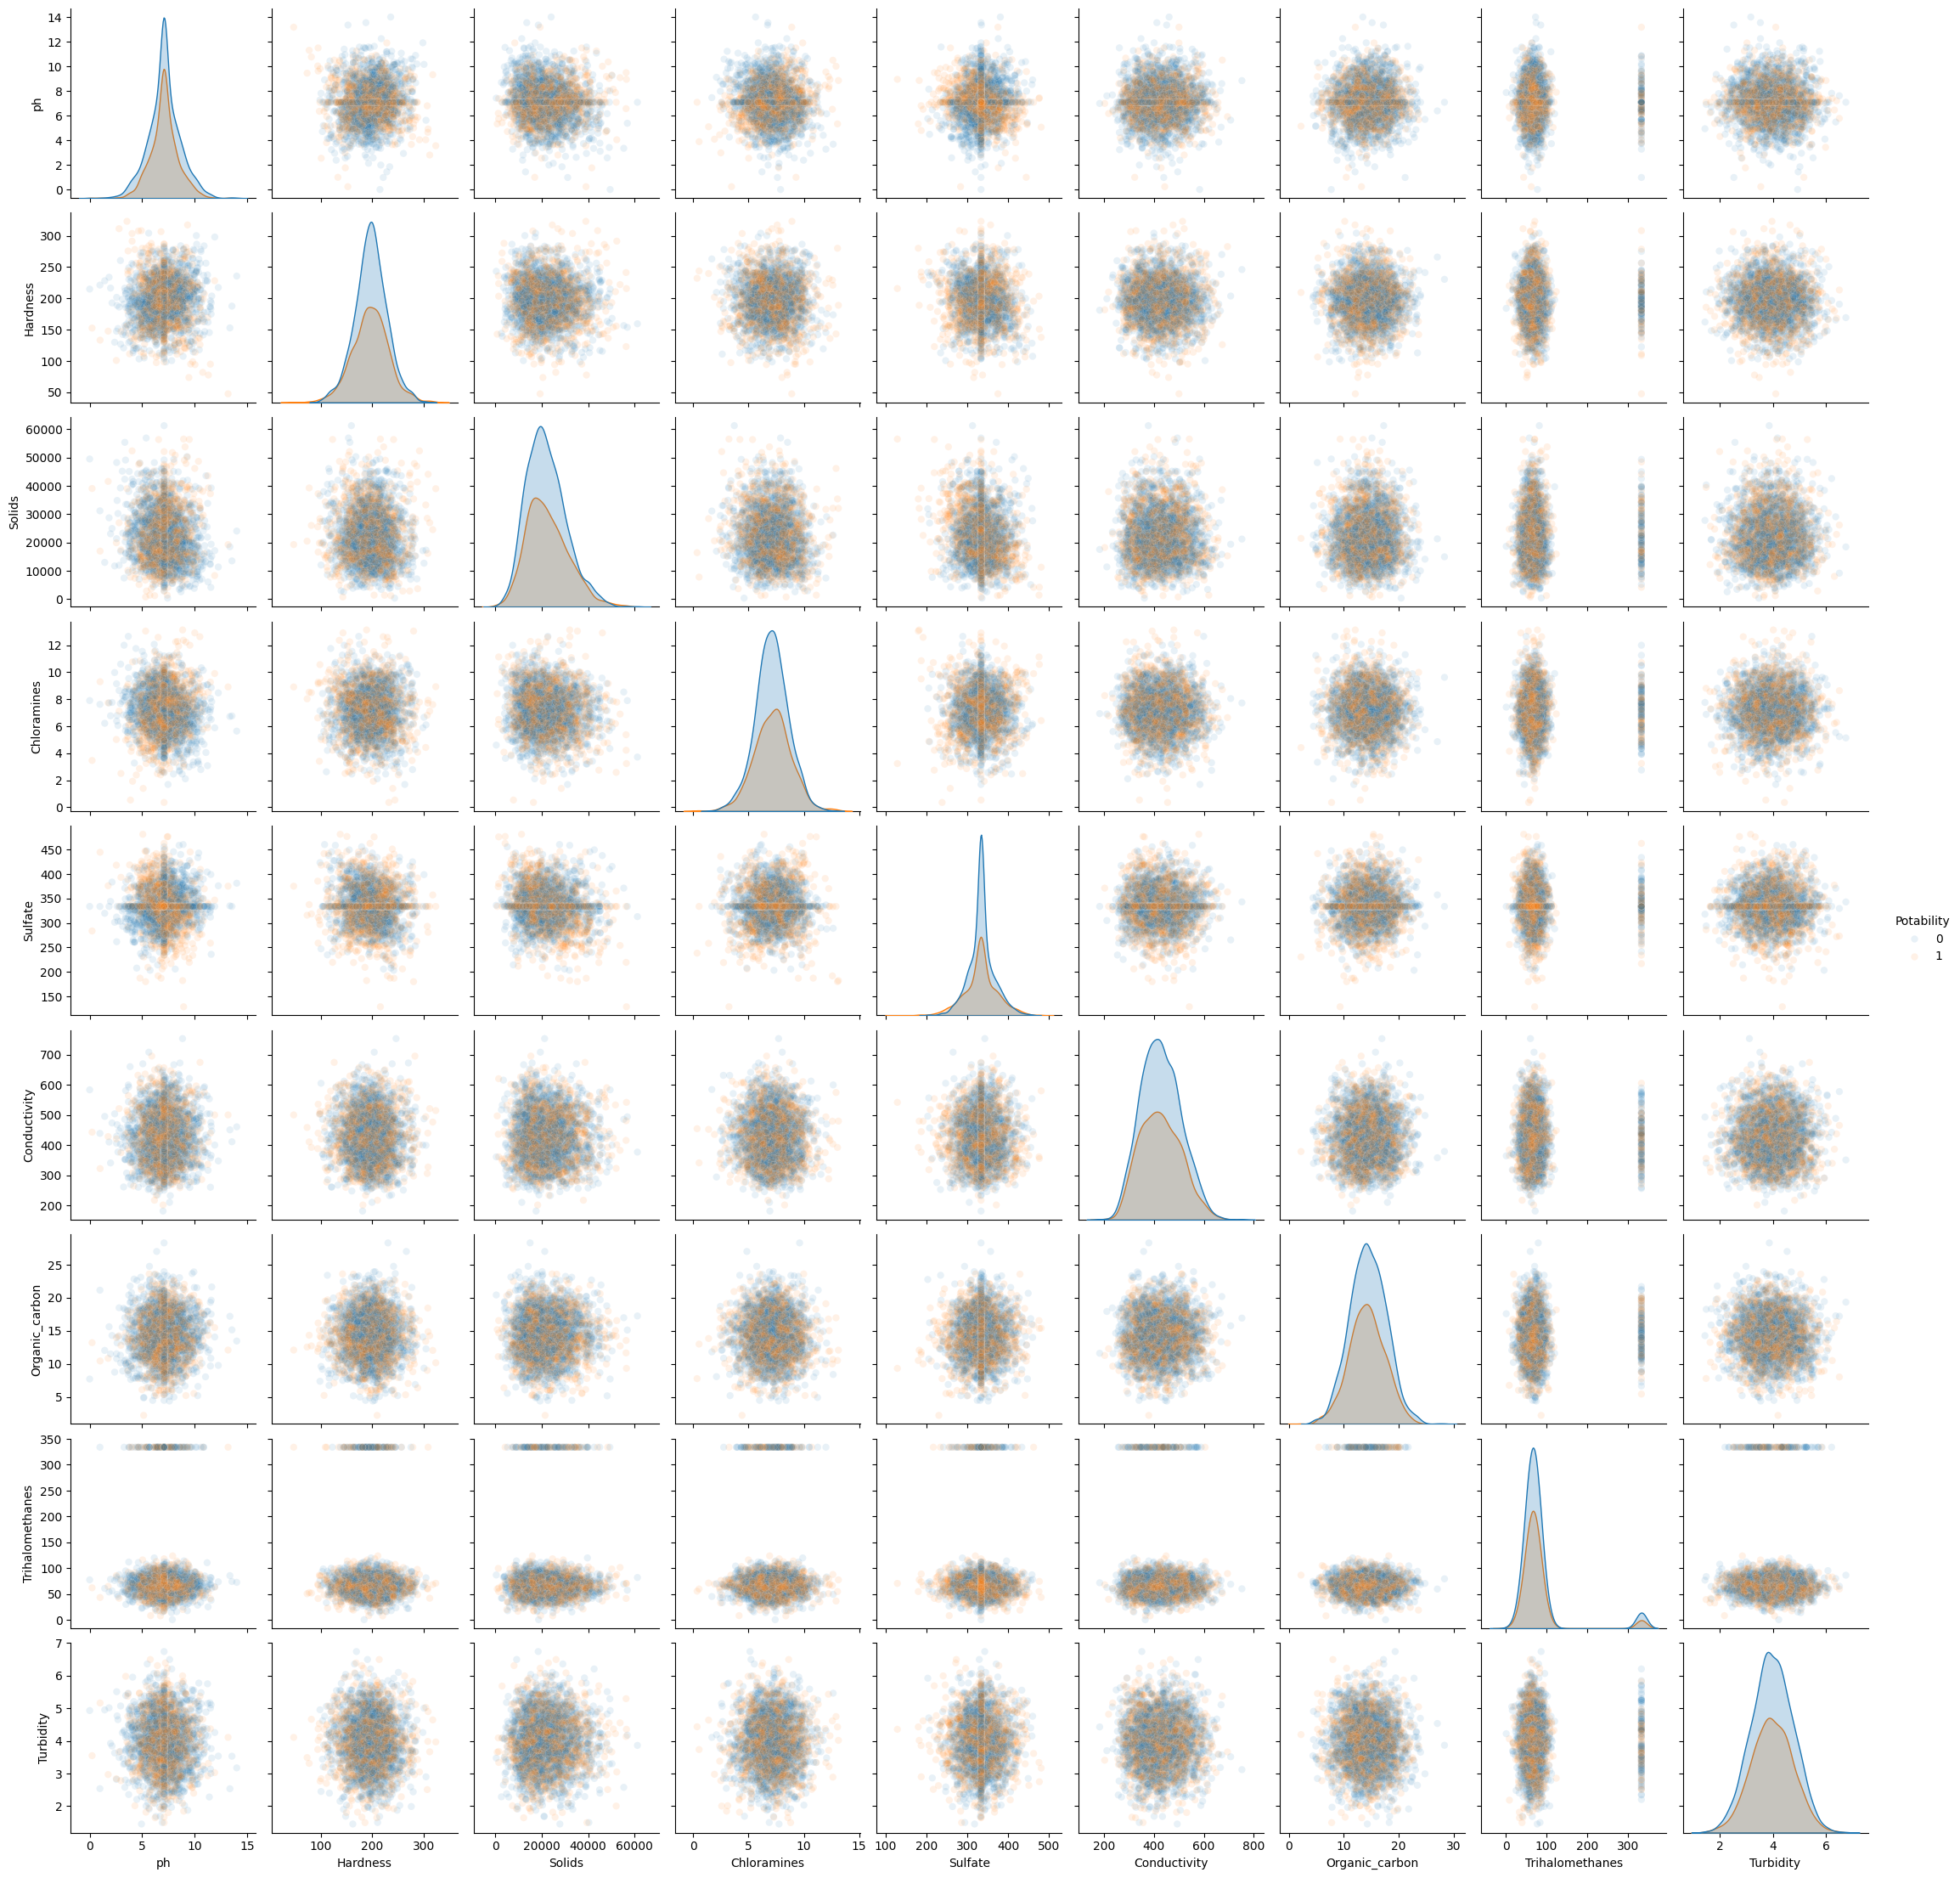

In [15]:
sns.pairplot(df,hue = "Potability",plot_kws = dict(alpha = 0.5))
sns.pairplot(df,hue = "Potability",plot_kws = dict(alpha = 0.1))